<style type="text/css">
    .formula {
        background: #f7f7f7;
        border-radius: 50px;
        padding: 15px;
    }
    .border {
        display: inline-block;
        border: solid 1px rgba(204, 204, 204, 0.4);
        border-bottom-color: rgba(187, 187, 187, 0.4);
        border-radius: 3px;
        box-shadow: inset 0 -1px 0 rgba(187, 187, 187, 0.4);
        background-color: inherit !important;
        vertical-align: middle;
        color: inherit !important;
        font-size: 11px;
        padding: 3px 5px;
        margin: 0 2px;
    }
</style>

# Teoría del Error
<p><code>Python en Jupyter Notebook</code></p>
<p>Creado por <code>Giancarlo Ortiz</code> para el curso de <code>Métodos Numéricos</code></p>

## Redondeo
En matemáticas el redondeo es una técnica que nos permite conseguir una representación inexacta de un valor real, pero con algún grado de fidelidad como para ser útil en algún propósito específico.

### Agenda
1. Cifras significativas
1. Aproximación
1. Truncamiento



In [1]:
# Importando módulos al cuaderno de Jupyter
from math import pi, e, sqrt, log, floor, ceil, trunc
import numpy as np
import pylab as pl

## 1. Cifras significativas
----
Las cifras significativas de un número son aquellos dígitos que han sido elegidos para utilizarse en forma confiable, de forma que sobre ellos no existe incertidumbre.

In [2]:
# Formato de número para ver cifras significativas
x = 1.24
y = 0.0000005
z = 0.000536

# Salida
print("---------------------------------------------------------------")
print(f"| Número sin formato    | {x}        | {y}     | {z}  |")
print(f"| Formato float         | {x:7.7f}   | {y:7.7f} | {z:7.7f} |")
print(f"| Formato exponencial   | {x:7.3e}   | {y:7.3e} | {z:7.3e} |")
print("---------------------------------------------------------------")

---------------------------------------------------------------
| Número sin formato    | 1.24        | 5e-07     | 0.000536  |
| Formato float         | 1.2400000   | 0.0000005 | 0.0005360 |
| Formato exponencial   | 1.240e+00   | 5.000e-07 | 5.360e-04 |
---------------------------------------------------------------


In [3]:
# Precio del Xiomi MI10T Pro-128GB
Precio_xiomi_euros = 699         # Euros
Valor_euro = 4_306.93
Alumnos = 30
Precio_xiomi = Precio_xiomi_euros * Valor_euro
Costo_1 = Alumnos * Precio_xiomi

# Salida
print("-------------------------------------------------------------------")
print(f"| Precio Xiomi [1 Unid]   :      {Precio_xiomi:,.2f}  :  {type(Precio_xiomi)}  |")
print(f"| Precio Xiomi [{Alumnos} Unid]  :     {Costo_1:,.2f}  :  {type(Costo_1)}  |")
print("-------------------------------------------------------------------")

-------------------------------------------------------------------
| Precio Xiomi [1 Unid]   :      3,010,544.07  :  <class 'float'>  |
| Precio Xiomi [30 Unid]  :     90,316,322.10  :  <class 'float'>  |
-------------------------------------------------------------------


In [4]:
#  Cifras significativas del costo de Xiomi MI10T Pro-128GB
Cifras_costo_1 = len(str(int(Costo_1)))

# Salida
print(f"Cifras Significativas Costo:      {Cifras_costo_1}")

Cifras Significativas Costo:      8


## 2. Aproximación
----
Es el proceso de sumar o restar valores para reducir el número de cifras significativas en la expresión decimal

In [5]:
# Precio de 30 iPhone 12-128GB en fallabella
Precio_iPhone = 5_199_900       # Presos Colombianos
Costo_2 = Alumnos * Precio_iPhone

# Salida
print("-------------------------------------------------------------------")
print(f"| Precio Xiomi   [1 Unid] :      {Precio_xiomi:_.2f}  |  {type(Precio_xiomi)} |")
print(f"| Precio iPhone  [1 Unid] :      {Precio_iPhone:_.2f}  |  {type(Precio_iPhone)}   |")
print(f"| Precio Xiomi  [{Alumnos} Unid] :     {Costo_1:,.2f}  |  {type(Costo_1)} |")
print(f"| Precio iPhone [{Alumnos} Unid] :    {Costo_2:,.2f}  |  {type(Costo_2)}   |")
print("-------------------------------------------------------------------")

-------------------------------------------------------------------
| Precio Xiomi   [1 Unid] :      3_010_544.07  |  <class 'float'> |
| Precio iPhone  [1 Unid] :      5_199_900.00  |  <class 'int'>   |
| Precio Xiomi  [30 Unid] :     90,316,322.10  |  <class 'float'> |
| Precio iPhone [30 Unid] :    155,997,000.00  |  <class 'int'>   |
-------------------------------------------------------------------


In [6]:
# Calculo del Sobrecosto de iPhone 12 vs Xiomi MI10T (todas las cifras significativas)
Sobrecosto = Costo_2 - Costo_1
Porcentaje_sobrecosto = 100 * ((Costo_1 - Sobrecosto) / Sobrecosto)

# Salida
print("---------------------------------------------------------------------")
print(f"| Precio Xiomi  [{Alumnos} Unid]  :    {Costo_1:14,.2f}  :  {type(Costo_1)}  |")
print(f"| Precio iPhone [{Alumnos} Unid]  :    {Costo_2:14,.2f}  :  {type(Costo_2)}    |")
print("---------------------------------------------------------------------")
print(f"| Sobrecosto {Alumnos} iphone     :    {Sobrecosto:14,.2f}  [Pesos]   |")
print(f"| Sobrecosto en porcentaje :    {Porcentaje_sobrecosto:14,.2f}  [  %  ]   |")
print("-----------------------------------------------------------")

---------------------------------------------------------------------
| Precio Xiomi  [30 Unid]  :     90,316,322.10  :  <class 'float'>  |
| Precio iPhone [30 Unid]  :    155,997,000.00  :  <class 'int'>    |
---------------------------------------------------------------------
| Sobrecosto 30 iphone     :     65,680,677.90  [Pesos]   |
| Sobrecosto en porcentaje :             37.51  [  %  ]   |
-----------------------------------------------------------


In [7]:
#  Cifras significativas del costo de los celulares Xiomi MI10T iPhone 12 de 128GB 
Cifras_costo_2 = len(str(int(Costo_2)))

# Salida
print("------------------------------------------")
print(f"| Cifras Significativas Costo 1 |  {Cifras_costo_1:4}  |")
print(f"| Cifras Significativas Costo 2 |  {Cifras_costo_2:4}  |")
print("------------------------------------------")


------------------------------------------
| Cifras Significativas Costo 1 |     8  |
| Cifras Significativas Costo 2 |     9  |
------------------------------------------


In [8]:
# Reducción de cifras significativas
Cifras_significativas = 3
Cifras_eliminar_1 = Cifras_costo_1 - Cifras_significativas
Cifras_eliminar_2 = Cifras_costo_2 - Cifras_significativas
Costo_aproximado_1 = round(Costo_1/(10 ** Cifras_eliminar_1), 0)*(10**Cifras_eliminar_1)
Costo_aproximado_2 = round(Costo_2/(10 ** Cifras_eliminar_2), 0)*(10**Cifras_eliminar_2)
Delta_1 =  Costo_aproximado_1 - Costo_1
Delta_2 =  Costo_aproximado_2 - Costo_2
Porcentaje_1 =  100 * (Delta_1 / Costo_1)
Porcentaje_2 =  100 * (Delta_2 / Costo_2)

# Salida
print(f"-------------------------------------------------------------------------")
print(f"          |       Costo Real | Costo aproximado |    Variación |    %   |")
print(f"-------------------------------------------------------------------------")
print(f"Costo 1:  | {Costo_1:16,.2f} | {Costo_aproximado_1:16,.2f} | {Delta_1:12,.2f} | {Porcentaje_1:5,.2f}% |")
print(f"Costo 2:  | {Costo_2:16,.2f} | {Costo_aproximado_2:16,.2f} | {Delta_2:12,.2f} | {Porcentaje_2:5,.2f}% |")
print(f"-------------------------------------------------------------------------")

-------------------------------------------------------------------------
          |       Costo Real | Costo aproximado |    Variación |    %   |
-------------------------------------------------------------------------
Costo 1:  |    90,316,322.10 |    90,300,000.00 |   -16,322.10 | -0.02% |
Costo 2:  |   155,997,000.00 |   156,000,000.00 |     3,000.00 |  0.00% |
-------------------------------------------------------------------------


In [9]:
# Calculo del Sobrecosto de iPhone 12 vs Xiomi MI10T (reducción de cifras significativas)
Sobrecosto_aprox = Costo_aproximado_2 - Costo_aproximado_1
Porcentaje_sobrecosto_aprox = 100 * ((Costo_aproximado_1 - Sobrecosto_aprox) / Sobrecosto_aprox)

# Salida
print(f"----------------------------------------------------")
print(f"Sobrecosto {Alumnos} iPhone      :   {Sobrecosto_aprox:10,.2f}  [Pesos]")
print(f"Sobrecosto en porcentaje  :          {Porcentaje_sobrecosto_aprox:6,.2f}  [  %  ]")
print(f"----------------------------------------------------")

----------------------------------------------------
Sobrecosto 30 iPhone      :   65,700,000.00  [Pesos]
Sobrecosto en porcentaje  :           37.44  [  %  ]
----------------------------------------------------


In [10]:
# Variación del sobrecosto al reducir las cifras significativas
Delta_de_sobrecosto = Porcentaje_sobrecosto - Porcentaje_sobrecosto_aprox

# Salida
print(f"---------------------------------------")
print(f"Variacion del sobrecosto: {Delta_de_sobrecosto:5,.2f} [  %  ]")
print(f"---------------------------------------")

---------------------------------------
Variacion del sobrecosto:  0.07 [  %  ]
---------------------------------------


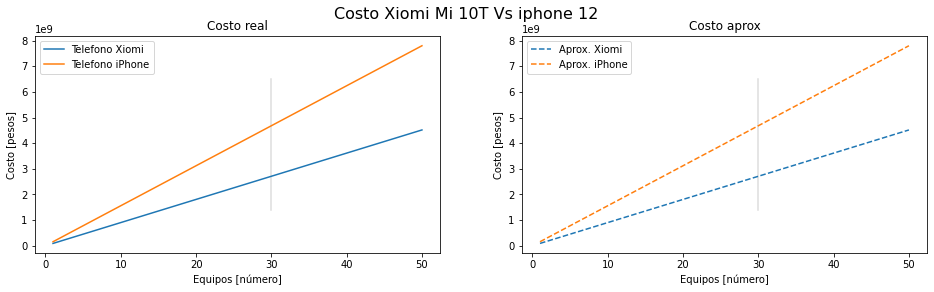

In [11]:
# Variación del sobrecosto con el número de equipos
No = np.linspace(1, 50, 50)
y1 = No * Costo_1
y2 = No * Costo_2
y3 = No * Costo_1
y4 = No * Costo_2

# Gráficas Costos
#-------------------
fig, ax = pl.subplots(1, 2)
fig.set_size_inches(16, 4)
fig.suptitle('Costo Xiomi Mi 10T Vs iphone 12', fontsize=16)

# Gráficas 1 - Costo Real
ax[0].axvline(x = Alumnos, ymin=0.2, ymax=0.8, color="#ddd")
ax[0].plot(No, y1, label="Telefono Xiomi")
ax[0].plot(No, y2, label="Telefono iPhone")
ax[0].set_title("Costo real")
ax[0].set_xlabel("Equipos [número]")
ax[0].set_ylabel("Costo [pesos]")
ax[0].legend()

# Gráficas 2 - Costo Aproximado
ax[1].axvline(x = Alumnos, ymin=0.2, ymax=0.8, color="#ddd")
ax[1].plot(No, y3, "--", label="Aprox. Xiomi")
ax[1].plot(No, y4, "--", label="Aprox. iPhone")
ax[1].set_title("Costo aprox")
ax[1].set_xlabel("Equipos [número]")
ax[1].set_ylabel("Costo [pesos]")
ax[1].legend()

pl.show()

In [12]:
# Cifras significativas y aproximación de números irracionales
x1 = (1 + sqrt(5)) / 2
x2 = e
x3 = pi

# Métodos de aproximación
y1 = round(x3, 3)
y2 = floor(x3 * 1000) / 1000
y3 = ceil(x3 * 1000) / 1000

# Salida
print('Número áureo: ', x1)
print('Número euler: ', x2)
print('Número pi: ', x3)
print('redondear 1: ', y1)
print('redondear 2: ', y2)
print('redondear 3: ', y3)

Número áureo:  1.618033988749895
Número euler:  2.718281828459045
Número pi:  3.141592653589793
redondear 1:  3.142
redondear 2:  3.141
redondear 3:  3.142


## 3. Truncamiento
---
Es el proceso de descartar cifras en la expresión decimal

In [13]:
# Truncamiento por representación de números en coma flotante
x1 = 0.1
x2 = 0.2
X3 = x1 + x2
x4 = pow(sqrt(2), 2)

y1 = x1 + x2
y2 = floor(y1*10)/10
y3 = x4
y4 = floor(y3 * 10) / 10

# Salida
print('Error coma flotante 1: ', y1)
print('tratamiento error   1: ', y2)
print('Error coma flotante 2: ', y3)
print('tratamiento error   2: ', y4)

Error coma flotante 1:  0.30000000000000004
tratamiento error   1:  0.3
Error coma flotante 2:  2.0000000000000004
tratamiento error   2:  2.0


In [14]:
# Truncamiento intencionado
x1 = -7.4

y1 = int(x1)
y2 = trunc(x1)
y3 = floor(x1)

# Salida
print('Truncar 1: ', y1)
print('Truncar 2: ', y2)
print('Truncar 3: ', y3)

Truncar 1:  -7
Truncar 2:  -7
Truncar 3:  -8


### <code>Ejemplo:</code> Transmisión por fibra óptica monomodo 
---
Cálculo de la señal de recepción con valores exactos <code>\[s1\]</code> y truncados <code>\[s2\]</code> que percibe una terminal óptica ONT después de enviar una señal portadora de 1.590 nm (de la tercera ventana) por una fibra monomodo hasta una terminal a 829 Km y esperar la respuesta.

![attenuation](img/map_attenuation_big.png)

In [15]:
# Variación de los resultados por truncamiento de variables en valores finales
# Transmisión por fibra óptica monomodo en condiciones ideales
# Calculo de la frecuencia y atenuación
# --------------------------------------
λ = 1590e-9                             # longitud de onda de tx  de la tercera ventana [m] (1590 nm)
Potencia = 10                           # Potencia modulo de Tx fibra [dbm]
Sensibilidad = -35                      # Sensibilidad modulo de Tx fibra [dbm]
# --------------------------------------
v = 204e6                               # Velocidad de la luz en la fibra óptica [m] (204 Km/ms)
α = -0.25                               # Atenuación por kilómetro en la tercera ventana [db/km]
n = 1.47                                # Indice típico de refracción de la luz en la fibra
f = trunc(2 * n * (v/λ) * (1/1e12))     # Frecuencia [Thz]
# --------------------------------------
Distancia = 829_000                     # Pasto - Bogotá
t_o = (Distancia / v) * (1000)          # Tiempo de ida [ms]
# --------------------------------------
A_o = (10**((Potencia-30)/10))*1e3      # Potencia módulo de Tx fibra [mW]
S = (10**((Sensibilidad-30)/10))*1e9    # Potencia mínima de Rx fibra [uW]
print(f"-------------------------------------------------------------------------------------")
print(f"  Frecuencia:                     {f:7.2f} Thz")
print(f"  Distancia recorrida:            {2 * Distancia/1000:7.2f} Km")
print(f"  Tiempo de llegada portadora:    {2 * t_o:7.2f} ms")
print(f"  Potencia de salida:             {Potencia:7.0f} dBm / {A_o:3.0f} mW")
print(f"  Potencia mínima:                {Sensibilidad:7.0f} dBm / {S:3.0f} uW")
# --------------------------------------
t1 = np.linspace(t_o, t_o + 0.01, 512)   # Tiempo Pasto - Bogotá [ms]
t2 = 2 * t1                              # Tiempo Pasto - Bogotá - Pasto [ms]
# --------------------------------------

# Valores reales
vre = e**(α*t1)
vrp = 2 * pi * f

# Valores truncados
vte = trunc(e)**(α*t1)
vtp = 2 * trunc(pi) * f

# Funciones de respuesta (Amplitud vs Tiempo) 
s1 = A_o * vre * (np.sin(2 * vrp * t1) + np.sin(6 * vrp * t1)/3 + np.sin(10 * vrp * t1)/5)
s2 = A_o * vte * (np.sin(2 * vtp * t1) + np.sin(6 * vtp * t1)/3 + np.sin(10 * vtp * t1)/5)

# Máximos
M1 = s1.max()
M2 = s2.max()
dBm1 = 10 * log((M1/1000), 10)
dBm2 = 10 * log((M2/1000), 10)

# Variaciones
print(f"  Potencia 1 de llegada:          {dBm1:7.0f} dBm / {M1:3.0f} uW")
print(f"  Potencia 2 de llegada:          {dBm2:7.0f} dBm / {M2:3.0f} uW")
print(f"-------------------------------------------------------------------------------------")
print(f"|  Valor e   | {e} |  {trunc(e)}  ->  Delta α  |  {M1:5.2e} uW   | {M2:5.2e} uW  |")
print(f"|  Valor pi  | {pi} |  {trunc(pi)}  ->  Delta f  |  {vrp:5.2e} Thz  | {vtp:5.2e} Thz |")
print(f"-------------------------------------------------------------------------------------")


-------------------------------------------------------------------------------------
  Frecuencia:                      377.00 Thz
  Distancia recorrida:            1658.00 Km
  Tiempo de llegada portadora:       8.13 ms
  Potencia de salida:                  10 dBm /  10 mW
  Potencia mínima:                    -35 dBm / 316 uW
  Potencia 1 de llegada:              -25 dBm /   3 uW
  Potencia 2 de llegada:              -23 dBm /   5 uW
-------------------------------------------------------------------------------------
|  Valor e   | 2.718281828459045 |  2  ->  Delta α  |  3.38e+00 uW   | 4.61e+00 uW  |
|  Valor pi  | 3.141592653589793 |  3  ->  Delta f  |  2.37e+03 Thz  | 2.26e+03 Thz |
-------------------------------------------------------------------------------------


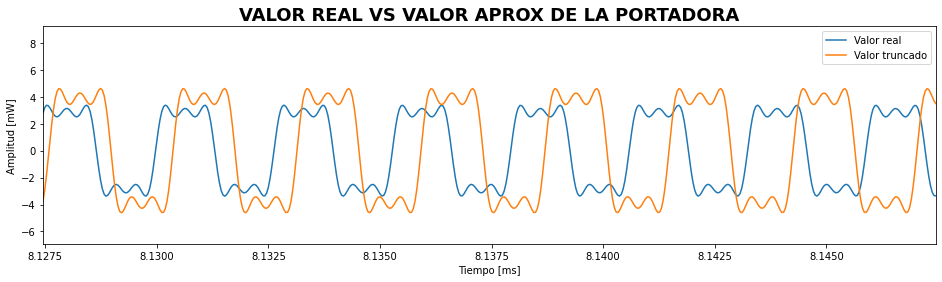

In [16]:
# Creación de la figura de MatplotLib
fig, ax = pl.subplots()
fig.set_size_inches(16, 4)

# Gráficas de valor real y truncado
ax.plot(t2, s1, label="Valor real")
ax.plot(t2, s2, label="Valor truncado")
pl.xlim(t2.min(), t2.max())
pl.ylim(s2.min() * 1.5, s2.max() * 2)

# Agregamos Texto
pl.title("Valor real Vs Valor aprox de la portadora".upper(), fontsize=18, fontweight="bold")
pl.xlabel("Tiempo [ms]")
pl.ylabel("Amplitud [mW]")
pl.legend()
pl.show()

---
## Mas Recursos

- [Cifras significativas](https://es.wikipedia.org/wiki/Cifras_significativas) (en Wikipedia)
- [Redondeo](https://es.wikipedia.org/wiki/Redondeo) (en Wikipedia)
- [Truncamiento](https://es.wikipedia.org/wiki/Truncamiento) (en Wikipedia)
